<br/>
<h1 align="center"> <span style = 'color:red'> Detecção de spam 
</span> </h1>
<br/>

<br/>
<h3 align="left"> <span style = 'color:green'> Classificação de texto </span> </h3>
<br/>



* No caso de um texto, o classificador assume que as palavras não tem uma relação entre elas.
<br/>

* Por exemplo, na frase *“I love my dog, but today it’s terrible”* o algoritmo assume que as palavras dessa frase não dependem uma da outra.
<br/>



<br/>
<h3 align="left"> <span style = 'color:green'> Modelo de representação CountVectorizer </span> </h3>
<br/>


* O modelo CountVEctorizer é binário cada documento é representado por um vetor de atributos binários de modo que cada atributo indica a ocorrencia ou nao de um termo no documento.



* Frequencia Absoluta:  Caso 1 indica que o termo está presente no documento e 0 o termo não esta presente no documento



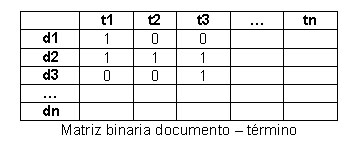



<br/>


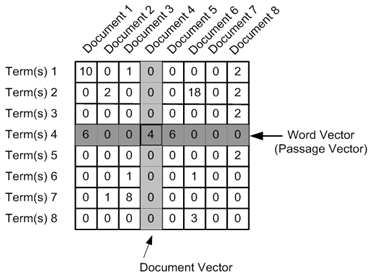



 
<h3 align="left"> <span style = 'color:green'> Modelo de representação  TF-IDFVectorizer   </span> </h3>
<br/>


* Utilizar uma matriz de pesos calculando a freuqneica dos termos o documento e a frequencia dos termos na coleção (base toda)

 
**TF Weight** : Atribui uma pontuação de frequência de termo ( TF ) aos n-grams extraídos. O valor para cada n-grama é a frequência de ocorrência no documento fornecido.
IDF Weight : Atribui uma pontuação de frequência de documento inversa ( IDF ) aos n-grams extraídos. O valor para cada n-grama é o logaritmo do tamanho do corpus dividido pela frequência de ocorrência em todo o corpus. Isso é: `IDF = log of corpus_size / document_frequency`



**TF-IDF Weight ( Peso TF-IDF)** : Atribui uma frequência de frequência / pontuação de frequência de documento inversa ( TF / IDF ) aos n-grams extraídos. O valor para cada n-grama é o seu escore TF multiplicado pela sua pontuação IDF.
Peso do Gráfico : Atribui pontuação aos n-gramas extraídos com base na classificação do gráfico TextRank. TextRank é um modelo de classificação baseado em gráfico para processamento de texto. Os algoritmos de classificação baseados em gráficos são essencialmente uma maneira de decidir a importância com base na informação global. Para obter mais informações, consulte TextRank - Colocar ordem em textos de Rada Mihalcea e Paul Tarau.





<img src="tfidf.png" width="800" height="800" align="center"/>






<br/>
<h3 align="left"> <span style = 'color:green'> Chamada das funções de representação vetorial do Texto </span> </h3>
<br/>


* **countvectorizer** apenas conta as palavras
<br/>

<code> vect = CountVectorizer(min_df=1)
       tweets_vector = vect.fit_transform(corpus)</code>

<br/>


* **tfidfvectorizer** utiliza o tf-idf 
<br/>


<code> tf_transformer = TfidfTransformer(use_idf=False).fit(tweets_vector)
tweets_vector_tf = tf_transformer.transform(tweets_vector)</code>
    
    


<br/>
<h3 align="left"> <span style = 'color:green'> Exemplos </span> </h3>
<br/>

<br/>


*`CountVectorizer().fit_transform(["foo bar baz", "foo bar quux"]).A
array([[1, 1, 1, 0],
      [1, 0, 1, 1]])`**


<br/>

*`TfidfVectorizer(use_idf=False).fit_transform(["foo bar baz", "foo bar quux"]).A
array([[ 0.57735027,  0.57735027,  0.57735027,  0.        ],
       [ 0.57735027,  0.        ,  0.57735027,  0.57735027]])`*

<br/>



<br/>
<h3 align="left"> <span style = 'color:green'> Exemplos dos dois modelos juntos </span> </h3>
<br/>

<br/>



<img src="dois.jpg" width="400" height="400" align="center"/>








<br/>

* Stopword são palavras frequentes em documentos e na coleção (corpus)

* São palavras que não influenciam a classificação do texto

<img src="stopwords.jpeg" width="500" height="500" align="center"/>

<br/>


In [2]:
# importando as biblioteca necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [72]:
# lendo a base de dados
# charset enconding é latin-1 porque a base sta em ingles, se fosse em portugues seria utf-8
spam_data = pd.read_csv('spam.csv', encoding='latin-1')



# mostrando apenas os 10 primeiros registros (linihas) do arquivo lido

spam_data.head(10)



,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


<h3 align="left"> <span style = 'color:green'> Observação    </span> </h3>
<br/>


* As colunas **Unnamed: 2, 3 e 4** são colunas vazias por isso tem a variável NaN, logo devem ser retiradas


* A variável de classificação é **V1**


* O texto do email é **V2**, este deve apssar por um pre-processamento





In [73]:
# retirando as colunas Unnamed: 2','Unnamed: 3','Unnamed: 4'

spam_data = spam_data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)



<h3 align="left"> <span style = 'color:green'> Atenção    </span> </h3>
<br/>

* Não faça a rotina acima duas vezes porque dá erro, pois as colunas já foram retiradas e como resposta voced terá que não existem essas colunas



In [74]:
# renomeando as colunas

spam_data = spam_data.rename(columns = {'v1': 'target','v2': 'text'})


# mostrando a novabase de dados
spam_data.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<h3 align="left"> <span style = 'color:green'>  Data Exploration    </span> </h3>
<br/>


* Algumas as estatísticas da base de dados



<h3 align="left"> <span style = 'color:green'>  Distribuição da classe Target    </span> </h3>
<br/>

* A classe Ham (not spam) é maior que a classe spam logo base desbalanceada

Text(0.5, 1.0, 'Data Distribution')

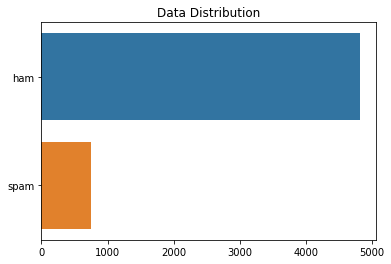

In [75]:
s = spam_data['target'].value_counts()
sns.barplot(x=s.values, y=s.index)
plt.title('Data Distribution')

<h3 align="left"> <span style = 'color:green'>  Mostrando o tamanho das palavras em cada classe    </span> </h3>
<br/>

* A classe Sapm possui texto palavras com maior número de string que a classe ham


* Quer dizer que na classe ham as palavras são menores

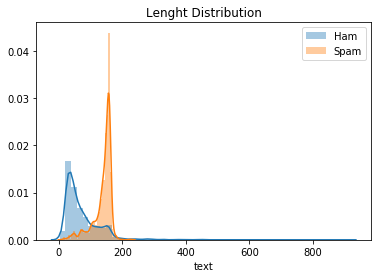

In [76]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

s1 = spam_data[spam_data['target'] == 'ham']['text'].str.len()
sns.distplot(s1, label='Ham')
s2 = spam_data[spam_data['target'] == 'spam']['text'].str.len()
sns.distplot(s2, label='Spam')
plt.title('Lenght Distribution')
plt.legend()


<h3 align="left"> <span style = 'color:green'> Mostrando a média do comprimento das palavras    </span> </h3>
<br/>




In [81]:
print(50 * '*')
print ('Ham',s1.mean(),'  ', 'Spam',s2.mean())
print(50 * '*')

**************************************************
Ham 71.02362694300518    Spam 138.8661311914324
**************************************************



* **We can notice that spams messages are often longer than ham messages.**



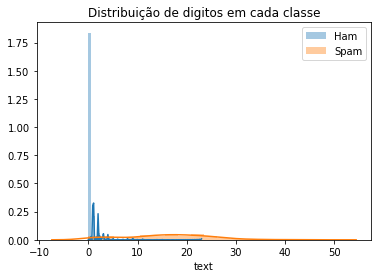

In [82]:
s1 = spam_data[spam_data['target'] == 'ham']['text'].str.replace(r'\D+', '').str.len()
sns.distplot(s1, label='Ham')
s2 = spam_data[spam_data['target'] == 'spam']['text'].str.replace(r'\D+', '').str.len()
sns.distplot(s2, label='Spam')
plt.title('Distribuição de digitos em cada classe')
plt.legend()

<h3 align="left"> <span style = 'color:green'>  Mostrando a média de dígitos por mensagem
   </span> </h3>
<br/>



* O mesmo para a presença de dígitos nas mensagens ham, estas mensagens apresentam maior quantidde de dígitos que as mensagens spam


* From this plot, it's clear that the digits distribution in ham messages are rigth skewed, presenting lower mean of digits than spam messages.


In [85]:
print(10 * '*')
print('Média\n')
print(60 * '*')
print('Ham=',s1.mean(),'   ','spam=',s2.mean())
print(60 * '*')

**********
Média

************************************************************
Ham= 0.2992746113989637     spam= 15.759036144578314
************************************************************




<h3 align="left"> <span style = 'color:green'>  Mostrando a quantidade de não-digitos em cada uma das classe
   </span> </h3>
<br/>





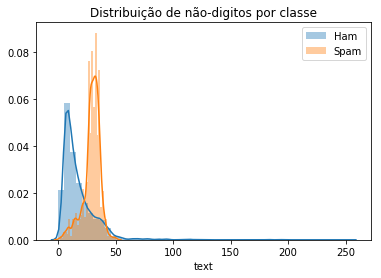

In [86]:
s1 = spam_data[spam_data['target'] == 'ham']['text'].str.replace(r'\w+', '').str.len()
sns.distplot(s1, label='Ham')
s2 = spam_data[spam_data['target'] == 'spam']['text'].str.replace(r'\w+', '').str.len()
sns.distplot(s2, label='Spam')
plt.title('Distribuição de não-digitos por classe')
plt.legend()

<h3 align="left"> <span style = 'color:green'>  Mostrando a média de não-digitos nas classes   </span> </h3>
<br/>



* These distributions resembles the ones regarding the text messages.


* Here, the values are smaller, though. Hams presents less non-digits than spams.






In [88]:
print(10 * '*')
print('Média\n')
print(60 * '*')
print('Ham=',s1.mean(),'  ','spam=', s2.mean())
print(60 * '*')

**********
Média

************************************************************
Ham= 17.29181347150259    spam= 29.041499330655956
************************************************************



<h3 align="left"> <span style = 'color:green'>  Mostrando estatísticas com os dados agrupados da classe alvo= target   </span> </h3>
<br/>



In [89]:
spam_data.groupby('target').describe()

text                                                               
       count unique                                                top freq
target                                                                     
ham     4825   4516                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4

<h3 align="left"> <span style = 'color:black'> Dividindo a base em treinamento e teste     </span> </h3>

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(spam_data['text'], 
                                                    spam_data['target'], 
                                                    random_state=0)



<h3 align="left"> <span style = 'color:green'> Count Vectorizer    </span> </h3>


In [92]:
from sklearn.feature_extraction.text import CountVectorizer

# chamando o método
vect = CountVectorizer().fit(X_train)

print(40 * '*')
print('Tamanho do Vocabulário:', len(vect.get_feature_names()))
print(70 * '*')
print('Palavras mais longa:', max(vect.vocabulary_, key=len))
print(70 * '*')
print('Observe que a palavra mais longa não faz sentido')
print(70 * '*')

# transformando o vetor de palavras em vetores de numero a partir da frequencia da palavra no documetos (email)
X_train_vectorized = vect.transform(X_train)

****************************************
Tamanho do Vocabulário: 7354
**********************************************************************
Palavras mais longa: com1win150ppmx3age16subscription
**********************************************************************
Observe que a palavra mais longa não faz sentido
**********************************************************************


<h3 align="left"> <span style = 'color:green'>   Criando o modelo de classificação Naive Bayes MultinomialNB  </span> </h3>
<br/>

In [93]:
from sklearn.naive_bayes import MultinomialNB


#criando modelo
model = MultinomialNB(alpha=0.1)

# treinando o modelo
model.fit(X_train_vectorized, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

<h3 align="left"> <span style = 'color:green'>  Extraindo features da base de dados   </span> </h3>
<br/>


* Features são as características da base de dados

In [94]:
# armazenando as características em uma vetor
feature_names = np.array(vect.get_feature_names())

# Ordenando os coeficientes (frequencia das palavras) do modelo criado
sorted_coef_index = model.coef_[0].argsort()



In [95]:
# mostrando os 10 menores e os 10 maiores coeficientes em função da frequencia da palavra no corpus (coleção de documentos)


print(70 * '*')
print('Menores coeficientes:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print(70 * '*')


print('Maiores Coeficientes: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))
print(70 * '*')

**********************************************************************
Menores coeficientes:
['kaiez' 'needy' 'needs' 'needing' 'needed' 'needa' 'ned' 'necklace'
 'neck' 'necessity']

**********************************************************************
Maiores Coeficientes: 
['to' 'call' 'you' 'your' 'free' 'for' 'the' 'now' 'or' 'txt']
**********************************************************************


<h3 align="left"> <span style = 'color:green'> Avaliando o desempenho do classificador    </span> </h3>
<br/>

In [96]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(vect.transform(X_test))

print(20 * '*')
print('Acurácia= %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
print(20 * '*')

********************
Acurácia= 99.21%
********************


<h3 align="left"> <span style = 'color:green'>  Tfidf   </span> </h3>
<br/>



* **Observação:** será ignorada a palavra que tiver uma frequencia menor que 3.

In [97]:
#carregando a biblioteca
from sklearn.feature_extraction.text import TfidfVectorizer

#criando o modelo
vect = TfidfVectorizer(min_df=3).fit(X_train)

print(40 * '*')
print('Tamanho do vocabulario:', len(vect.get_feature_names()))
print(40 * '*')
print('Maior palavra:', max(vect.vocabulary_, key=len))
print(40 * '*')

#aplicando o modelo na base de dados
X_train_vectorized = vect.transform(X_train)

****************************************
Tamanho do vocabulario: 2295
****************************************
Maior palavra: tscs087147403231winawk
****************************************


<h3 align="left"> <span style = 'color:green'> Craindo o modelo de classificação - MultinomialNB     </span> </h3>
<br/>

In [98]:
#criando modelo
model = MultinomialNB(alpha=0.1)

#treinando modelo
model.fit(X_train_vectorized, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

<h3 align="left"> <span style = 'color:green'>  Extraindo features da base de dados   </span> </h3>
<br/>


* Features são as características da base de dados

In [99]:
#armazenando as caracteristicas em um vetor
feature_names = np.array(vect.get_feature_names())


#ordenando o vetor do mior para o menor
sorted_coef_index = model.coef_[0].argsort()



In [101]:
print(70 * '*')
print('Menor coeficiente é: \n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print(70 * '*')
print('Maior Coeficiente é: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))
print(70 * '*')

**********************************************************************
Menor coeficiente é: 
['ûò' 'hell' 'height' 'hee' 'heavy' 'shower' 'showing' 'head' 'hella' 'he']

**********************************************************************
Maior Coeficiente é: 
['to' 'call' 'free' 'your' 'txt' 'you' 'or' 'for' 'now' 'stop']
**********************************************************************


<h3 align="left"> <span style = 'color:green'>  Avaliando o desempenho   </span> </h3>
<br/>

In [102]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(vect.transform(X_test))


print(20 * '*')
print('Acurácia: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
print(20 * '*')

********************
Acurácia: 98.35%
********************


<h2 align="left"> <span style = 'color:blue'> Manipulando a base de dados    </span> </h2>
<br/>


* Adicionando features para ver se melhora o desempenho do classificador


In [103]:
def add_feature(X, feature_to_add):
    """
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    """
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')


<h3 align="left"> <span style = 'color:green'>  Primeiro Modelo   </span> </h3>
<br/>




* Ignorar os termos que aparecem menos de 3 vezes.



* Usando esta matriz de termo de documento (frequencia) e um recurso adicional, o comprimento do documento (número de caracteres), vamos testar como o Tfidf é executado.



In [106]:
vect = TfidfVectorizer(min_df=5).fit(X_train)

print(40 * '*')
print('Tamanho do vocabulario:', len(vect.get_feature_names()))
print(40 * '*')
print('Maior palavra:', max(vect.vocabulary_, key=len))
print(40 * '*')


X_train_vectorized = vect.transform(X_train)


# adicionando uma nova caracteristica - o tamanho da  palavra X_train.str.len()

X_train_vectorized = add_feature(X_train_vectorized, X_train.str.len())

****************************************
Tamanho do vocabulario: 1468
****************************************
Maior palavra: congratulations
****************************************


<h3 align="left"> <span style = 'color:green'> Craindo o modelo  MultinomialNB   </span> </h3>
<br/>


In [108]:
#criando modelo
model = MultinomialNB(alpha=0.1)


#treinando modelo
model.fit(X_train_vectorized, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

<h3 align="left"> <span style = 'color:green'> Exibindo as caracteristicas desse novo modelo     </span> </h3>
<br/>


In [111]:
#armazenando as caracteristicas em um vetor
index = np.array(vect.get_feature_names() + ['length_of_doc'])
values  = model.coef_[0]
features_series = pd.Series(data=values,index=index)

print(90 * '*')
print('Menores coeficientes:\n{}\n'.format(features_series.nsmallest(10).index.values.tolist()))
print(90 * '*')
print('Maiores coeficientes: \n{}'.format(features_series.nlargest(10).index.values.tolist()))
print(90 * '*')

******************************************************************************************
Menores coeficientes:
['8th', 'aathi', 'abiola', 'able', 'abt', 'accept', 'across', 'actually', 'add', 'advance']

******************************************************************************************
Maiores coeficientes: 
['length_of_doc', 'to', 'call', 'free', 'your', 'txt', 'or', 'you', 'now', 'for']
******************************************************************************************


<h3 align="left"> <span style = 'color:green'>  Avaliando desempenho desse novo modelo   </span> </h3>
<br/>


In [113]:
X_test_vectorized = vect.transform(X_test)
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.len())
    
y_pred = model.predict(X_test_vectorized)
print(20 * '*')
print('Acurácia: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
print(20 * '*')

********************
Acurácia: 98.35%
********************


<h3 align="left"> <span style = 'color:green'>  Segundo Modelo  </span> </h3>
<br/>


 

* Ignorar termos (palavras) que tenham frequencia menor que 5



* Utiizar o metodo n-gram ->   n=1, n=2 e n=3   (unigam, bigram e trigram)



* Método n-gram é uma forma de reduzir o tamanho do arquivo



* Exemplo na figura abaixo


</br>
</br>



<img src="ngram.png" width="400" height="400" align="center"/>




</br>
</br>






**Adicionando outras características a esse modelo**


* Tamanho do documento (numero de caracter)



* Quantidade de dígitos por documento



</br>



In [115]:
vect = TfidfVectorizer(min_df=5, ngram_range=(1, 3)).fit(X_train)


print(40 * '*')
print('Tamanho do vocabulario:', len(vect.get_feature_names()))
print(60 * '*')
print('Palavra mais longa ->', max(vect.vocabulary_, key=len))
print(60 * '*')




X_train_vectorized = vect.transform(X_train)

X_train_vectorized = add_feature(X_train_vectorized, X_train.str.len())
X_train_vectorized = add_feature(X_train_vectorized, X_train.str.replace(r'\D+', '').str.len())

****************************************
Tamanho do vocabulario: 3383
************************************************************
Palavra mais longa -> customer service representative
************************************************************


<h3 align="left"> <span style = 'color:green'>  Criando o modelo para a nova base   </span> </h3>
<br/>

In [116]:
#criando modelo
model = MultinomialNB(alpha=0.1)

#treinando modelo
model.fit(X_train_vectorized, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

<h3 align="left"> <span style = 'color:green'>  Armazenando as caracteristicas e mostrando coeficientes   </span> </h3>
<br/>

In [117]:
index = np.array(vect.get_feature_names() + ['length_of_doc', 'digit_count'])
values  = model.coef_[0]
features_series = pd.Series(data=values,index=index)

print(100 * '*')
print('Menor Coeficiente:\n{}\n'.format(features_series.nsmallest(10).index.values.tolist()))
print(100 * '*')
print('Maior Coeficiente: \n{}'.format(features_series.nlargest(10).index.values.tolist()))
print(100 * '*')

****************************************************************************************************
Menor Coeficiente:
['8th', 'aathi', 'abiola', 'able', 'able to', 'about me', 'about that', 'about this', 'about to', 'about you']

****************************************************************************************************
Maior Coeficiente: 
['length_of_doc', 'digit_count', 'to', 'call', 'free', 'your', 'txt', 'or', 'for', 'stop']
****************************************************************************************************


<h3 align="left"> <span style = 'color:green'>  Avaliando o desempenho    </span> </h3>
<br/>

In [118]:
X_test_vectorized = vect.transform(X_test)
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.len())
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.replace(r'\D+', '').str.len())
    
y_pred = model.predict(X_test_vectorized)

print(20 * '*')
print('Acuracia: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
print(20 * '*')


********************
Acuracia: 97.42%
********************


Ops, accuracy dropped a bit.


<h3 align="left"> <span style = 'color:green'> Terceiro Modelo    </span> </h3>
<br/>


* Utilizando o Count Vectorizer ignorando os termos que aparecem menos de 5 vezes no documento


* Utilizando n-gram de 2 e 5


* É necessário passar o parametro ` analyzer='char_wb' ` que vai criar o metodo *n-grams* somente para  texto n-grams apenas a partir do texto dentro dos limites das palavras.


* A opção 'char_wb' cria caracteres n-grams, mas não gera n-grams que cruzam limites de palavras.



* Pode deixar o modelo mais robusto.




**Adicionando novas características:**


* Tamanho do documento (quantidade de caracteres)


* numero de digitos por documento


* Numero de caracteres non-word characters (qualquer coisa que não seja letras, digitos ou underscore.)




In [120]:
vect = CountVectorizer(min_df=5, ngram_range=(2, 5), analyzer='char_wb').fit(X_train)

print(100 * '*')
print('Tamanho do vocabulario:', len(vect.get_feature_names()))
print(100 * '*')
print('Palavra mais longa:', max(vect.vocabulary_, key=len))
print(100 * '*')


X_train_vectorized = vect.transform(X_train)


#adcionando caracteristicas

#quantidade de caracter
X_train_vectorized = add_feature(X_train_vectorized, X_train.str.len())

#numero de digitos por documento
X_train_vectorized = add_feature(X_train_vectorized, X_train.str.replace(r'\D+', '').str.len())


#Numero de caracteres non-word characters (qualquer coisa que não seja letras, digitos ou underscore.)
X_train_vectorized = add_feature(X_train_vectorized, X_train.str.replace(r'\w+', '').str.len())

****************************************************************************************************
Tamanho do vocabulario: 16314
****************************************************************************************************
Palavra mais longa:  i'll
****************************************************************************************************


<h3 align="left"> <span style = 'color:green'>  Criando Modelo MultinomialNB   </span> </h3>
<br/>

In [121]:
model = MultinomialNB(alpha=0.1)
model.fit(X_train_vectorized, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [122]:
index = np.array(vect.get_feature_names() + ['length_of_doc', 'digit_count', 'non_word_char_count'])
values = model.coef_[0]
features_series = pd.Series(data=values,index=index)

print(100 * '*')
print('Menor coefiencite:\n{}\n'.format(features_series.nsmallest(10).index.values.tolist()))
print(100 * '*')
print('Maior coeficiente: \n{}'.format(features_series.nlargest(10).index.values.tolist()))
print(100 * '*')

****************************************************************************************************
Menor coefiencite:
[' !! ', " !!'", " !!''", ' $ ', ' &a', ' &am', ' &amp', ' &l', ' &lt', ' &lt;']

****************************************************************************************************
Maior coeficiente: 
['length_of_doc', 'non_word_char_count', 'digit_count', 'e ', ' t', ' c', 't ', 's ', 'r ', 'to']
****************************************************************************************************


<h3 align="left"> <span style = 'color:green'> Avaliando o Desempenho do modelo criado    </span> </h3>
<br/>

In [123]:
X_test_vectorized = vect.transform(X_test)
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.len())
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.replace(r'\D+', '').str.len())
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.replace(r'\w+', '').str.len())
    
y_pred = model.predict(X_test_vectorized)

print(20 * '*')
print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
print(20 * '*')


********************
Accuracy: 99.07%
********************
